# Assignment: Data Wrangling
### `! git clone https://github.com/ds3001f25/wrangling_assignment.git`
### Do Q1 and Q2
### Reading material: `tidy_data.pdf`

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `./data/mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Is this a concern? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing?
3. Dummy variable: For the pretrial data covered in the lecture `./data/justice_data.parquet`, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

In [92]:
# I acknowledge that I have used AI to the extent permitted by the UVA
# AI acceptable use policy. I acknowlegde that I am aware of the possibility
# of AI producing errors and offensive content and certify that I
# have taken the necessary measures to ensure that the work produced is both
# accurate and ethical to the best of my ability.

import pandas as pd
import numpy as np

# Q1.1

airbnb = pd.read_csv("airbnb_hw.csv")

airbnb["Price_clean"] = (
    airbnb["Price"]
    .str.replace(",", "", regex=False)
)

airbnb["Price_clean"] = pd.to_numeric(airbnb["Price_clean"], errors="coerce")

missing_prices = airbnb["Price_clean"].isna().sum()

print(f"Number of missing values in Price_clean: {missing_prices}")
print(airbnb[["Price", "Price_clean"]].head(10))

# I wrote code to remove the commas from values equal to or greater than 1000.
# I also wrote code to both identify and remove missing values, and then coerced
# those values to numeric (as often classified as strings by NumPy and Pandas).

Number of missing values in Price_clean: 0
  Price  Price_clean
0   145          145
1    37           37
2    28           28
3   199          199
4   549          549
5   149          149
6   250          250
7    90           90
8   270          270
9   290          290


In [32]:
# Q1.2
police = pd.read_csv("mn_police_use_of_force.csv")
police["subject_injury"].unique()

print(police["subject_injury"].unique())
police["clean_subject_injury"] = police["subject_injury"].replace(' ',np.nan)

police["clean_subject_injury"] = police["subject_injury"].fillna("Unknown")

counts = police["clean_subject_injury"].value_counts()
print(counts)

# After cleaning, we can see that only a fraction of the values have either
# a 'Yes' or 'No.' Specifically, there are 9848 "missing" data out of a total of
# 12,925 observations (a proportion of 0.7619), meaning that the data for subject
# injury is largely incomplete. This is a concern because we have insufficient
# data to analyze when determining how subjects are treated, potentially presenting
# an incomplete holistic picture of this data.

pd.crosstab(police["clean_subject_injury"], police["force_type"])
# Based on our crosstabitulation, we can see that the "Unknown" or missing data
# is generally positively correlated to the uses of each force type. This means
# that across most force types, the specific result (injury, no injury, or missing data)
# matches that of the general counts for each of those results. For instance, the
# "Bodily Force" observation has roughly 7000 values as opposed to "no" and "yes"
# each habving close to 1000, mirroring the ratios of the overall counts of each
# variable (yes, no, and unknown).


[nan 'No' 'Yes']
clean_subject_injury
Unknown    9848
Yes        1631
No         1446
Name: count, dtype: int64


force_type,Baton,Bodily Force,Chemical Irritant,Firearm,Gun Point Display,Improvised Weapon,Less Lethal,Less Lethal Projectile,Maximal Restraint Technique,Police K9 Bite,Taser
clean_subject_injury,,,,,,,,,,,
No,0,1093,131,2,33,34,0,1,0,2,150
Unknown,2,7051,1421,0,27,74,87,0,170,31,985
Yes,2,1286,41,0,44,40,0,2,0,44,172


In [56]:
# Q1.3

justice = pd.read_parquet("justice_data.parquet")
print(justice["WhetherDefendantWasReleasedPretrial"].unique())

justice["WhetherDefendantWasReleasedPretrial"].value_counts(dropna=False)

justice["clean_released_pretrial"] = justice["WhetherDefendantWasReleasedPretrial"].replace(9, np.nan)

justice["released_pretrial_str"] = justice["clean_released_pretrial"].map({
    1.0: "Yes",
    0.0: "No",
    np.nan: np.nan
})

justice["released_pretrial_str"].value_counts(dropna=False)




[9 0 1]


,count
released_pretrial_str,
Yes,19154
No,3801
NaN,31


In [6]:
# Q1.4
import pandas as pd
import numpy as np

# I assigned the data a name (justice)
justice = pd.read_parquet("/content/justice_data.parquet")

# Here, I begin my cleaning of the "Imposed Sentence" variable. I convert
# everything to text, strip them of all extra spaces, turn them lowercase, and
# replace all fillers for missing data with the proper indicator (NaN).
justice["clean_imposed_sentence"] = (
    justice["ImposedSentenceAllChargeInContactEvent"]
    .astype(str).str.strip().str.lower()
    .replace({"": np.nan, "nan": np.nan, "none": np.nan})
)
# Here, I coerce the values back into numeric.
justice["clean_imposed_sentence"] = pd.to_numeric(
    justice["clean_imposed_sentence"], errors="coerce"
)

# Finally, I ran a value_counts operation to see how the data had been cleaned.
justice["clean_imposed_sentence"].value_counts()


,count
clean_imposed_sentence,
0.000000,4953
12.000000,1404
0.985626,1051
6.000000,809
3.000000,787
...,...
2.197125,1
21.164271,1
1.657084,1


**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks (Hint: `GSAF5.xls`).

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work.
2. Drop any columns that do not contain data.
3. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
4. Clean the Age variable and make a histogram of the ages of the victims.
5. What proportion of victims are male?
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?
9. What proportion of attacks appear to be by white sharks? (Hint: `str.split()` makes a vector of text values into a list of lists, split by spaces.)

In [10]:
import pandas as pd
import numpy as np
#2.1
shark = pd.read_excel("/content/GSAF5.xls")
#2.2
shark = shark.dropna(axis=1, how="all")

In [24]:
#2.3
shark = pd.read_excel("/content/GSAF5.xls").dropna(axis=1, how="all")

shark["year_clean"] = (
    shark["Year"]
    .astype(str)
    .str.strip()
    .str.replace(r"[^\d]", "", regex=True)
    .replace("", np.nan)
    .astype(float)
)
current_year = 2025

shark.loc[(shark["year_clean"] < 1000) | (shark["year_clean"] > current_year), "year_clean"] = np.nan

valid_years = shark["year_clean"].dropna()
if not valid_years.empty:
    year_min, year_max = int(valid_years.min()), int(valid_years.max())
    print("year range:", year_min, "-", year_max)
else:
    print("No valid years found.")


shark_recent = shark[shark["year_clean"] >= 1940].copy()

attacks_by_year = shark_recent["year_clean"].value_counts().sort_index()

print(attacks_by_year.head(10))
print(attacks_by_year.tail(10))

if attacks_by_year.is_monotonic_increasing:
    trend = "increasing"
elif attacks_by_year.is_monotonic_decreasing:
    trend = "decreasing"
else:
    trend = "not strictly increasing or decreasing"

print("Overall trend since 1940:", trend)

No valid years found.
Series([], Name: count, dtype: int64)
Series([], Name: count, dtype: int64)
Overall trend since 1940: increasing


['?' '63' '9' '39' '19' '7' '85' '69' '18' '66' '21' '40' '37' '16' '20'
 '12' '42' '26' '14' '45' '30' '30+' '56' '40+' '29' 35 58 29 24 20 55 17
 12 37 36 23 40 28 69 48 '60+' 57 45 61 27 38 16 68 33 30 15 41 14 43 26
 'Middle age' 18 21 49 25 46 19 65 64 '13' nan '11' '46' '32' '10' '64'
 '62' '22' '15' '52' '44' '47' '55' '59' '8' '50' '34' '38' '30s' '20/30'
 '35' '65' '20s' '77' '60' '49' '!2' '24' '73' '25' '50s' '58' '67' '17'
 '6' '41' '53' '68' '43' '51' '31' 39 51 10 13 60 '40s' 62 'teen' 8 22 32
 56 'Teen' 42 50 'M' 9 31 11 34 '!6' '!!' 47 7 71 59 53 54 75 '45 and 15'
 73 52 70 4 63 44 '28 & 22' '22, 57, 31' '60s' "20's" 67 74 '9 & 60'
 'a minor' 6 3 82 '40?' 66 72 '23' '36' '71' '48' '70' '18 months' '57'
 '28' '33' '61' '74' '27' '3' '28 & 26' '5' '54' '86' '18 or 20'
 '12 or 13' '46 & 34' '28, 23 & 30' 'Teens' 77 '36 & 26' '8 or 10' 84
 '\xa0 ' ' ' '30 or 36' '6½' '21 & ?' '33 or 37' 'mid-30s' '23 & 20' 5
 ' 30' '7      &    31' ' 28' '20?' "60's" '32 & 30' '16 to 18' '8

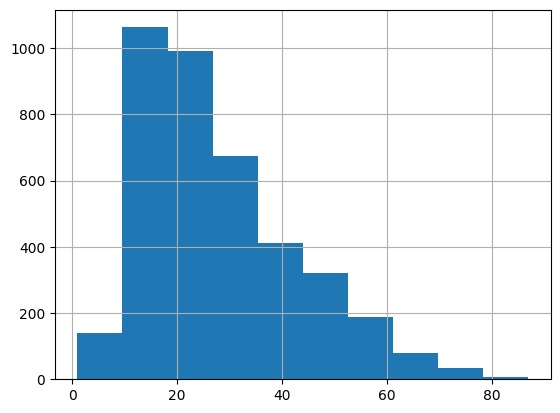

In [25]:
#2.4 Clean the Age variable and make a histogram of the ages of the victims.

print(shark["Age"].unique())

Age = shark["Age"].astype(str).str.strip()

shark["Age_clean"] = Age.where(Age.str.fullmatch(r"\d+")).astype(float)

print(shark["Age_clean"].head(20))
print(shark["Age_clean"].describe())

shark['Age_clean'] = pd.to_numeric(shark['Age_clean'], errors='coerce')

shark["Age_clean"].head(20)

histogram = shark["Age_clean"].hist()


In [32]:
#2.5 What proportion of victims are male?

shark["Sex_clean"] = (
    shark["Sex"]
    .astype(str)
    .str.upper()
    .str.strip()
    .str.replace(" ", "", regex=False)
    .replace({"": np.nan, "NAN": np.nan, "NONE": np.nan})
    .where(lambda x: x.isin(["M", "F"]))
)

print(shark["Sex_clean"].value_counts(dropna=False))

prop_male = (shark["Sex_clean"].str.upper() == "M").mean()

# After cleaning the Sex variable, the proportion of Male sharks to the total
# number of sharks is 0.8751.

Sex_clean
M      5652
F       806
NaN     584
Name: count, dtype: int64


In [38]:
#2.6 Clean the Type variable so it only takes three values: Provoked and Unprovoked and Unknown.
# What proportion of attacks are unprovoked?

shark["Type_clean"] = (
    shark["Type"]
    .astype(str).str.strip().str.title()
    .replace({
        "": np.nan,
        "Nan": np.nan,
        "None": np.nan
    })
)

shark["Type_clean"] = shark["Type_clean"].where(
    shark["Type_clean"].isin(["Provoked", "Unprovoked"]),
    "Unknown"
)

shark["Type_clean"].unique()
shark["Type_clean"].value_counts()

# The proportion of unprovoked attacks are 5197/7042, or 0.73.

,count
Type_clean,
Unprovoked,5197
Unknown,1204
Provoked,641


In [45]:
#2.7 Clean the Fatal Y/N variable so it only takes three values: Y, N, and Unknown.

shark["Fatal_clean"] = (
    shark["Fatal Y/N"]
    .astype(str).str.strip().str.upper()
    .replace({"": np.nan, "NAN": np.nan, "NONE": np.nan})
)

shark["Fatal_clean"] = shark["Fatal_clean"].where(
    shark["Fatal_clean"].isin(["Y", "N"]),
    "Unknown"
)

print(shark["Fatal_clean"].value_counts())
print(shark["Fatal_clean"].value_counts(normalize=True))

Fatal_clean
N          4917
Y          1482
Unknown     643
Name: count, dtype: int64
Fatal_clean
N          0.698239
Y          0.210452
Unknown    0.091309
Name: proportion, dtype: float64


In [47]:
#2.8
# Are sharks more likely to launch unprovoked attacks on men or women?
# Is the attack more or less likely to be fatal when the attack is provoked or unprovoked?
# Is it more or less likely to be fatal when the victim is male or female?
# How do you feel about sharks?

sex_type = pd.crosstab(shark["Sex_clean"], shark["Type_clean"], normalize="index")
print("Proportion of Provoked/Unprovoked/Unknown attacks by sex")
print(sex_type)
#They're more likely to launch unprovoked attacks on women.


type_fatal = pd.crosstab(shark["Type_clean"], shark["Fatal_clean"], normalize="index")
print("Fatality rates by attack type")
print(type_fatal)
# They're more likely to be fatal when they're unprovoked


sex_fatal = pd.crosstab(shark["Sex_clean"], shark["Fatal_clean"], normalize="index")
print("Fatality rates by victim sex")
print(sex_fatal)
# It's more likely to be fatal when the victim's male.


Proportion of Provoked/Unprovoked/Unknown attacks by sex
Type_clean  Provoked   Unknown  Unprovoked
Sex_clean                                 
F           0.038462  0.114144    0.847395
M           0.097311  0.133935    0.768754
Fatality rates by attack type
Fatal_clean         N   Unknown         Y
Type_clean                               
Provoked     0.953198  0.014041  0.032761
Unknown      0.372924  0.460963  0.166113
Unprovoked   0.742159  0.015201  0.242640
Fatality rates by victim sex
Fatal_clean         N   Unknown         Y
Sex_clean                                
F            0.761787  0.086849  0.151365
M            0.697275  0.081387  0.221338


In [ ]:
#2.9 What proportion of attacks appear to be by white sharks?
# (Hint: str.split() makes a vector of text values into a list of lists, split by spaces.)